In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\DELL\\Git\\Clases\\Semana 7\\datos\\online_shoppers_intention_clase_nonulls_estan_sinout_encoding.csv', index_col=0).reset_index(drop=True)
df.head()

,AdministrativeDuration,Informational,InformationalDuration,ProductRelatedDuration,ExitRates,PageValues,Administrative_knn,ProductRelated_knn,BounceRates_knn,VisitorType,OperatingSystems,Browser,Region,Month,TrafficType
0,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,-0.263158,-0.566667,11.461524,2.0,3.0,5.077266,4.820688,1.074171,3.044277
1,-0.028789,0.0,0.0,-0.417913,2.095621,0.0,-0.263158,-0.533333,-0.221550,2.0,2.0,5.019744,5.067919,0.965979,7.013654
2,-0.028789,0.0,0.0,-0.467912,4.895621,0.0,-0.263158,-0.566667,-0.221550,2.0,1.0,4.761668,8.752755,0.913082,3.080806
3,-0.028789,0.0,0.0,-0.465829,3.215621,0.0,-0.052632,-0.533333,2.699218,2.0,4.0,5.019744,5.178251,0.965979,6.546186
4,-0.028789,0.0,0.0,0.022315,0.695621,0.0,-0.263158,-0.266667,0.946757,2.0,4.0,2.279404,5.067919,0.965979,6.546186


In [4]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

In [5]:
x= df.drop(columns='PageValues')
y = df[['PageValues']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42) # puede ser train_size = 0.8
#shuffle = true

In [7]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [8]:
# Definimos un espacio de parámetros para optimizar
params_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

cambiar el modelo para el gradient, agrego learning rate

In [9]:
modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_rf.fit(x_train, y_train['PageValues'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [10]:
modelo_final_rf

RandomForestRegressor(max_depth=5, max_leaf_nodes=30, n_estimators=150,
                      random_state=42)

In [14]:
grid_search_rf.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [11]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)

In [13]:
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.227335,6.896057,213.299491,14.604776
test,0.092629,7.062302,230.318826,15.176259


In [21]:
df_importancia = pd.DataFrame(modelo_final_rf.feature_importances_, columns=['Importancia'], index=x.columns).sort_values(by = 'Importancia', ascending=False)
df_importancia.head()

,Importancia
ExitRates,0.309941
Browser,0.201151
ProductRelatedDuration,0.135017
ProductRelated_knn,0.089917
AdministrativeDuration,0.061178


<Axes: xlabel='Importancia', ylabel='None'>

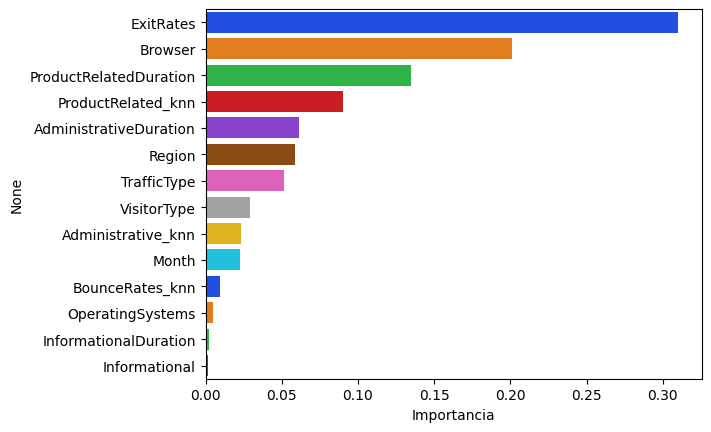

In [28]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

In [16]:
x_train_reducida = x_train.drop(columns= 'InformationalDuration')
x_test_reducida = x_test.drop(columns= 'InformationalDuration')
x_test_reducida.head()

,AdministrativeDuration,Informational,ProductRelatedDuration,ExitRates,Administrative_knn,ProductRelated_knn,BounceRates_knn,VisitorType,OperatingSystems,Browser,Region,Month,TrafficType
8916,2.636007,0.0,0.354150,-0.339162,0.526316,1.000000,0.032429,2.0,3.0,5.933010,4.892454,5.618395,5.378648
772,0.052987,2.0,1.488215,-0.566727,1.315789,2.166667,0.285298,2.0,2.0,4.740534,4.406243,3.412382,6.821112
12250,0.740262,0.0,2.899227,-0.345340,0.000000,3.600000,-0.181371,2.0,2.0,4.788621,4.818562,5.522524,6.688086
7793,2.607957,0.0,0.006039,0.034510,0.263158,-0.266667,0.265244,2.0,2.0,5.832906,4.634220,5.199573,6.197820
6601,-0.009715,0.0,-0.035757,0.030340,0.000000,-0.033333,-0.007836,2.0,2.0,4.788621,3.773965,5.199573,3.233688


In [24]:
# Definimos un espacio de parámetros para optimizar
params_rf_v2 = {
    'n_estimators': [140, 150, 160],
    'max_features': [2,4,6,8,10,13],
    'max_depth': [5,6,7],
    'min_samples_split': [1,2,3,4],
    'min_samples_leaf': [1, 2, 3], 
    'max_leaf_nodes': [25,30,35,40]
}

modelo_rf_v2 = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf_v2 = GridSearchCV(modelo_rf_v2,
                              params_rf_v2,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_rf_v2.fit(x_train_reducida, y_train['PageValues'].values) # array de una dim
modelo_final_rf_v2 = grid_search_rf_v2.best_estimator_

In [27]:
y_pred_test_rf_v2 = modelo_final_rf_v2.predict(x_test_reducida)
y_pred_train_rf_v2 = modelo_final_rf_v2.predict(x_train_reducida)
df_metricas_rf_v2 = metricas(y_train, y_pred_train_rf_v2, y_test, y_pred_test_rf_v2)
df_metricas_rf_v2

,r2_score,MAE,MSE,RMSE
train,0.298902,6.720996,193.542793,13.911966
test,0.104747,7.040118,227.242821,15.074575


r2_score, overfitting


## Gradient Booster

In [32]:
# Definimos un espacio de parámetros para optimizar
params_gb = {
    'n_estimators': [140, 150, 160],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3,4,5,6],
    'min_samples_split': [1,2,3,4],
    'min_samples_leaf': [1, 2, 3], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train_reducida, y_train['PageValues'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [33]:
y_pred_test_gb = modelo_final_gb.predict(x_test_reducida)
y_pred_train_gb = modelo_final_gb.predict(x_train_reducida)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.302868,6.662778,192.448159,13.872569
test,0.105097,7.140286,227.154005,15.071629


# XGB

In [35]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 3.4 MB/s eta 0:00:38
   ---------------------------------------- 0.8/124.9 MB 2.4 MB/s eta 0:00:52
   ---------------------------------------- 1.0/124.9 MB 1.6 MB/s eta 0:01:19
    --------------------------------------- 2.1/124.9 MB 2.5 MB/s eta 0:00:50
    --------------------------------------- 2.4/124.9 MB 2.6 MB/s eta 0:00:48
    --------------------------------------- 2.9/124.9 MB 2.2 MB/s eta 0:00:56
   - -------------------------------------- 3.9/124.9 MB 2.5 MB/s eta 0:00:48
   - -------------------------------------- 4.5/124.9 MB 2.5 MB/s eta 0:00:49
   - -------------------------------------- 4.7/124.9 MB 2.4 MB/s eta 0:00:50
   - -------------------------------------- 5.2/124.9 MB 2.4 MB/s eta 0:00:50
   - -------------------------------------- 5.5/124.9 MB 2.4 MB/s eta 0:00:50
   - -------------------------------------- 5.5/124.9 MB 2.4 MB/s eta 0


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:
from xgboost import XGBRegressor

In [41]:
# Definimos un espacio de parámetros para optimizar
params_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3,4,5],
    'min_child_weight': [1,2,3,4],
    'subsample': [0.6, 0.8, 1], 
    'colsample_bytree': [0.25,0.30,0.35,0.40]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train_reducida, y_train) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [39]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [40]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test_reducida)
y_pred_train_xgb = modelo_final_xgb.predict(x_train_reducida)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.250916,6.825637,206.789720,14.380185
test,0.099606,7.140979,228.547874,15.117800
